In [233]:
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Librerias

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Label Mappings
| a | b | c | d | e | f | g | h | i | k  | l  | m  | n  | o  | p  | q  | r  | s  | t  | u  | v  | w  | x  | y  | z |
|---|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 |

In [236]:
mappings = np.array(["a","b","c","d","e","f","g","h","i","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"])

# con LDA

In [237]:
from sklearn.utils.estimator_checks import check_estimator
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from scipy import spatial

from sklearn.neighbors import KNeighborsClassifier

class KNN_LDA(BaseEstimator):
    
    def __init__(self, n_comps=1, k=3):
        self.n_comps = n_comps
        self.k = k
        pass

    def fit(self, X, y, **kwargs):
        if y is None:
            raise ValueError('requires y to be passed, but the target y is None')

        X, y = check_X_y(X, y)
        self.is_fitted_ = True
        self.n_features_in_ = X.shape[1]
        
        self.es_lda_model_ = LDA(n_components=self.n_comps)
        es_lda = self.es_lda_model_.fit_transform(X,y.ravel())
        self.es_kd_tree_ = KNeighborsClassifier(n_neighbors=self.k)
        self.es_kd_tree_.fit(es_lda, y.ravel())
       
        return self
        
    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)
        es_tf_test = self.es_lda_model_.transform(X)

        return (self.es_kd_tree_.predict(es_tf_test))

    def predict_proba(self,X):
      es_tf_test = self.es_lda_model_.transform(X)
      return(self.es_kd_tree_.predict_proba(es_tf_test))
check_estimator(KNN_LDA())

# con PCA

In [238]:
from sklearn.utils.estimator_checks import check_estimator
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as PCA
from sklearn.decomposition import PCA
import numpy as np
from scipy import spatial

from sklearn.neighbors import KNeighborsClassifier

class KNN_PCA(BaseEstimator):
    
    def __init__(self, n_comps=1, k=3):
        self.n_comps = n_comps
        self.k = k
        pass

    def fit(self, X, y, **kwargs):
        if y is None:
            raise ValueError('requires y to be passed, but the target y is None')

        X, y = check_X_y(X, y)
        self.is_fitted_ = True
        self.n_features_in_ = X.shape[1]
        self.es_PCA_model_ = PCA(n_components=self.n_comps)

        es_PCA = self.es_PCA_model_.fit_transform(X,y.ravel())
        # print(es_PCA)
        self.es_kd_tree_ = KNeighborsClassifier(n_neighbors=self.k)
        self.es_kd_tree_.fit(es_PCA, y.ravel())
       
        return self
        
    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)
        es_tf_test = self.es_PCA_model_.transform(X)

        return (self.es_kd_tree_.predict(es_tf_test))

    def predict_proba(self,X):
      es_tf_test = self.es_PCA_model_.transform(X)
      return(self.es_kd_tree_.predict_proba(es_tf_test))
check_estimator(KNN_PCA())

# todas las caracteristicas

In [239]:
from sklearn.utils.estimator_checks import check_estimator
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as PCA
from sklearn.decomposition import PCA
import numpy as np
from scipy import spatial

from sklearn.neighbors import KNeighborsClassifier

class KNN_FULL(BaseEstimator):
    
    def __init__(self, n_comps=1, k=3):
        self.n_comps = n_comps
        self.k = k
        pass

    def fit(self, X, y, **kwargs):
        if y is None:
            raise ValueError('requires y to be passed, but the target y is None')

        X, y = check_X_y(X, y)
        self.is_fitted_ = True
        self.n_features_in_ = X.shape[1]
        
        # self.es_PCA_model_ = PCA(n_components=self.n_comps)
        # es_PCA = self.es_PCA_model_.fit_transform(X,y.ravel())
        self.es_kd_tree_ = KNeighborsClassifier(n_neighbors=self.k)
        # self.es_kd_tree_.fit(es_PCA, y.ravel())
        self.es_kd_tree_.fit(X, y.ravel())
       
        return self
        
    def predict(self, X):
        check_is_fitted(self, 'is_fitted_')
        X = check_array(X)
        # es_tf_test = self.es_PCA_model_.transform(X)

        # return (self.es_kd_tree_.predict(es_tf_test))
        return (self.es_kd_tree_.predict(X))

    def predict_proba(self,X):
      # es_tf_test = self.es_PCA_model_.transform(X)
      # return(self.es_kd_tree_.predict_proba(es_tf_test))
      return(self.es_kd_tree_.predict_proba(X))
check_estimator(KNN_FULL())

In [240]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cnf_matrix(Y_test, Y_pred):
  cnf_matrix = confusion_matrix(Y_test, Y_pred)

  # f = sns.heatmap(cnf_matrix, annot=True, fmt='d')
  cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

  plt.rcParams['figure.figsize'] = (20, 10)
  ax= plt.subplot()
  sns.heatmap(cnf_matrix, annot=True, fmt='.2f', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 

In [241]:
# from sklearn.preprocessing import StandardScaler
sign_df = pd.read_csv("dataset/sign_mnist_full.csv")

sign_X = sign_df.loc[:,  sign_df.columns != "label"].values
sign_Y = sign_df.loc[:,["label"]].values

# sign_df
# SS = StandardScaler()
# x = SS.fit_transform(x)
# x = pd.DataFrame(x)

In [242]:
sign_df_train = pd.read_csv("dataset/sign_mnist_train.csv")

sign_X_train = sign_df_train.loc[:,  sign_df_train.columns != "label"].values
sign_Y_train = sign_df_train.loc[:,["label"]].values

sign_df_test = pd.read_csv("dataset/sign_mnist_test.csv")

sign_X_test = sign_df_test.loc[:,  sign_df_test.columns != "label"].values
sign_Y_test = sign_df_test.loc[:,["label"]].values

In [ ]:
# modl = KNN_LDA(21,6)
# modl.fit(X=x, y=y.ravel())
# yxd = modl.predict(x_test)

In [ ]:
# cnf_matrix = confusion_matrix(y_test, yxd)
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # f = sns.heatmap(cnf_matrix, annot=True, fmt='d')
# cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

# plt.rcParams['figure.figsize'] = (20, 10)
# ax= plt.subplot()
# sns.heatmap(cnf_matrix, annot=True, fmt='.2f', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# # ax.xaxis.set_ticklabels(["neutral", "surprise", "sad", "disgust", "fear", "happy", "angry"]); ax.yaxis.set_ticklabels(["neutral", "surprise", "sad", "disgust", "fear", "happy", "angry"]);


# KFold CV with KNN

In [243]:
from xml.etree.ElementInclude import include
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import itertools

def KFold_KNN(X_, Y_, k_splits_ = 10, n_comps_ = 20, k_ = 3):
  kf = KFold(n_splits=k_splits_, shuffle=False)
  precision = recall = f1 = AUC = 0
  for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index, :], X_[test_index, :] 
    Y_train, Y_test = Y_[train_index], Y_[test_index]
    Scaler = StandardScaler()
    X_train = Scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train)

    X_test = Scaler.transform(X_test)
    X_test = pd.DataFrame(X_test)

    model = KNN_LDA(n_comps_,k_)
    model.fit(X=X_train, y=Y_train.ravel())
    Y_predicted = model.predict(X_test)

    print(Y_test.ravel())
    print(Y_predicted)      
    
    # metrics
    precision += precision_score(Y_test, Y_predicted, average="macro")
    recall += recall_score(Y_test, Y_predicted, average="macro")
    f1 += f1_score(Y_test, Y_predicted,  average="macro")
    AUC += roc_auc_score(Y_test, model.predict_proba(X_test),multi_class='ovr', average="macro")

  precision /= k_splits_
  recall /= k_splits_
  f1 /= k_splits_
  AUC /= k_splits_

  print(f"Final metrics ({k_splits_}-Fold, {n_comps_}-LDA vectors, {k_}-NN search)\n", 
  "Precision:", "{:.2f}".format(precision),
  " | Recall:", "{:.2f}".format(recall), 
  " | F1:", "{:.2f}".format(f1),
  " | AUC:","{:.2f}".format(AUC))

  # plot_cnf_matrix(Y_test, Y_predicted)
  return(pd.DataFrame(np.array([[precision, recall, f1, AUC, k_splits_, n_comps_, k_]]),
                   columns=['Precision', 'Recall', 'F1', 'AUC', 'Folds', 'LDA Vectors', 'NN Search']))


# KFold_KNN(sign_X, sign_Y, 4, 1, 1)

## Generar tabla de comparacion

In [244]:
table = pd.DataFrame(columns=['Precision', 'Recall', 'F1', 'AUC', 'Folds', 'LDA Vectors', 'NN Search'])

for fold in [2,4]:
  for vector in [1]:
    for K_ in [1]:
      table = pd.concat([table, 
                KFold_KNN(sign_X, sign_Y, fold, vector, K_)],
                axis=0).reset_index(drop=True)

[21 24 19 ... 13 24  8]
[24 23  7 ... 13 15  7]
[13  0 14 ... 21 15  6]
[14  0 14 ...  3  5 20]
Final metrics (2-Fold, 1-LDA vectors, 1-NN search)
 Precision: 0.13  | Recall: 0.13  | F1: 0.13  | AUC: 0.55
[21 24 19 ... 20  0 16]
[ 3 23  6 ...  6 16 12]


In [ ]:
table.sort_values('AUC', ascending=False)

,Precision,Recall,F1,AUC,Folds,LDA Vectors,NN Search
31,0.983343,0.983279,0.983289,0.998917,4.0,8.0,7.0
30,0.985919,0.985878,0.985880,0.998538,4.0,8.0,5.0
15,0.976705,0.976608,0.976616,0.998483,2.0,8.0,7.0
29,0.988566,0.988535,0.988537,0.997979,4.0,8.0,3.0
14,0.980095,0.980044,0.980052,0.997889,2.0,8.0,5.0
13,0.984070,0.984030,0.984033,0.997110,2.0,8.0,3.0
44,0.991934,0.991885,0.991888,0.995761,8.0,8.0,1.0
28,0.990957,0.990932,0.990934,0.995284,4.0,8.0,1.0
12,0.987326,0.987264,0.987278,0.993353,2.0,8.0,1.0
43,0.813561,0.812459,0.811601,0.978214,8.0,4.0,7.0


## Bootstrap with KNN

It 0 complete
Final metrics (1-Iteration, 0.5-Sample Ratio 8-LDA vectors, 3-NN search)
 Precision: 0.98  | Recall: 0.98  | F1: 0.98  | AUC: 1.00


,Precision,Recall,F1,AUC,Folds,LDA Vectors,NN Search
0,0.979173,0.979098,0.979118,0.995781,1.0,8.0,3.0


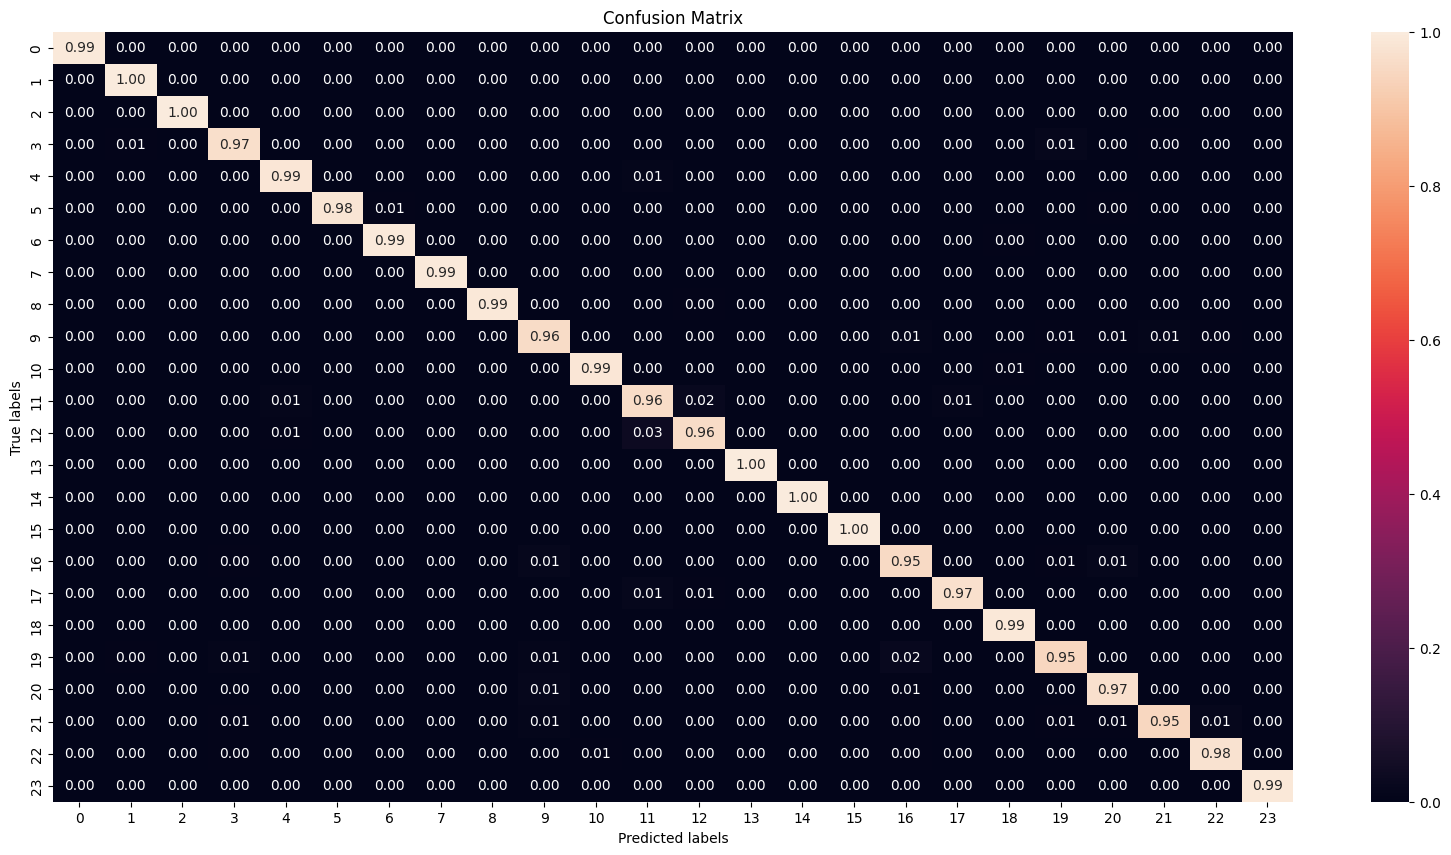

In [234]:
from sklearn.utils import resample # for Bootstrap sampling

def Bootstrap_KNN(X_, Y_, n_iterations = 10, sample_size = 0.50, n_comps_ = 20, k_ = 3):
  n_size = int(X_.shape[0] * sample_size) #Size of sample, picking only 50% of the given data in every bootstrap sample
  indexes = list(range(0, X_.shape[0]))
  precision = recall = f1 = AUC = 0

  for i in range(n_iterations):
      
    train = resample(indexes, n_samples = n_size)
    train_unique = np.unique(train)
    test = [ele for ele in indexes if ele not in train_unique]

    X_train = X_[train]
    Y_train = Y_[train]

    X_test = X_[test]
    Y_test = Y_[test]

    Scaler = StandardScaler()
    X_train = Scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train)

    X_test = Scaler.transform(X_test)
    X_test = pd.DataFrame(X_test)

    model = KNN_LDA(n_comps_,k_)
    model.fit(X=X_train, y=Y_train.ravel())
    Y_predicted = model.predict(X_test)

    # metrics
    precision += precision_score(Y_test, Y_predicted, average="macro")
    recall += recall_score(Y_test, Y_predicted, average="macro")
    f1 += f1_score(Y_test, Y_predicted,  average="macro")
    AUC += roc_auc_score(Y_test, model.predict_proba(X_test),multi_class='ovr',average='macro')

    print("It",i,"complete")
    
  precision /= n_iterations
  recall /= n_iterations
  f1 /= n_iterations
  AUC /= n_iterations
  
  print(f"Final metrics ({n_iterations}-Iteration, {sample_size}-Sample Ratio {n_comps_}-LDA vectors, {k_}-NN search)\n", 
  "Precision:", "{:.2f}".format(precision),
  " | Recall:", "{:.2f}".format(recall), 
  " | F1:", "{:.2f}".format(f1),
  " | AUC:","{:.2f}".format(AUC))

  # plot_cnf_matrix(Y_test, Y_predicted)
  return(pd.DataFrame(np.array([[precision, recall, f1, AUC, n_iterations, n_comps_, k_]]),
                   columns=['Precision', 'Recall', 'F1', 'AUC', 'Folds', 'LDA Vectors', 'NN Search']))

# con las caracterisitcas que le pases
Bootstrap_KNN(sign_X, sign_Y,1,n_comps_=8)

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\SSD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\__init__.py)

In [81]:
from distutils.command.bdist import show_formats
from xml.etree.ElementInclude import include
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import itertools

from sklearn.model_selection import train_test_split

def split_KNN(X_, Y_, k_splits_ = 10, n_comps_ = 20, k_ = 3):
  # kf = KFold(n_splits=k_splits_, random_state=42, shuffle=True)
  # kf = KFold(n_splits=k_splits_)

  # split = 0
  precision = recall = f1 = AUC = 0
  X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.25, 
                                                      shuffle=True)
                                                      # random_state=42)
  # X_train, X_test, Y_train, Y_test = sign_X_train, sign_X_test,sign_Y_train,sign_Y_test


    # X_train, X_test = X_[train_index, :], X_[test_index, :] 
    # Y_train, Y_test = Y_[train_index], Y_[test_index]

  Scaler = StandardScaler()
  X_train = Scaler.fit_transform(X_train)
  X_train = pd.DataFrame(X_train)

  X_test = Scaler.transform(X_test)
  X_test = pd.DataFrame(X_test)
  # print(X_test.head())
  # return 
  model = KNN_LDA(n_comps_,k_)
  model.fit(X=X_train, y=Y_train.ravel())
  Y_predicted = model.predict(X_test)

  np.set_printoptions(threshold=300)
  print(Y_test.ravel())
  print(Y_predicted)      
  # metrics

  precision += precision_score(Y_test, Y_predicted, average="weighted")
  recall += recall_score(Y_test, Y_predicted, average="weighted")
  f1 += f1_score(Y_test, Y_predicted,  average="weighted")
  AUC += roc_auc_score(Y_test, model.predict_proba(X_test),multi_class='ovr')

  # precision /= k_splits_
  # recall /= k_splits_
  # f1 /= k_splits_
  # AUC /= k_splits_

  print(f"Final metrics ({0}-Fold, {n_comps_}-LDA vectors, {k_}-NN search)\n", 
  "Precision:", "{:.2f}".format(precision),
  " | Recall:", "{:.2f}".format(recall), 
  " | F1:", "{:.2f}".format(f1),
  " | AUC:","{:.2f}".format(AUC))

  return(pd.DataFrame(np.array([[precision, recall, f1, AUC, k_splits_, n_comps_, k_]]),
                   columns=['Precision', 'Recall', 'F1', 'AUC', 'Folds', 'LDA Vectors', 'NN Search']))

  # plot_cnf_matrix(Y_test, Y_predicted)


split_KNN(sign_X, sign_Y, 20, 1, 1)

[20  3 15 ...  1 23 11]
[11 22 11 ...  7 15 17]
Final metrics (0-Fold, 1-LDA vectors, 1-NN search)
 Precision: 0.13  | Recall: 0.13  | F1: 0.13  | AUC: 0.55


,Precision,Recall,F1,AUC,Folds,LDA Vectors,NN Search
0,0.129983,0.130415,0.129966,0.546048,20.0,1.0,1.0


# TODO-> CHECK WHY KNN_LDA() IMPLEMENTATION IS DIFFERENT


In [60]:
from xml.etree.ElementInclude import include
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, recall_score, precision_score,roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import itertools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from sklearn.model_selection import train_test_split

def query_get_expressions(kd_tree, x_list_validation, y_list, k=3):
  d,i = kd_tree.query(x_list_validation,k)
  expression_list = y_list[i]

  return d, expression_list.flatten()

def startingKNN(X_, Y_, k_splits_ = 10, n_comps_ = 20, k_ = 3):
  # kf = KFold(n_splits=k_splits_, random_state=False, shuffle=False)
  
  df = pd.read_csv("dataset/sign_mnist_train.csv")
  df
  from sklearn.preprocessing import StandardScaler
  x = df.loc[:,  df.columns != "label"].values
  y = df.loc[:,["label"]].values

  SS = StandardScaler()
  x = SS.fit_transform(x)
  x = pd.DataFrame(x)

  lda_model = LDA(n_components=21)
  lda = lda_model.fit_transform(x,y.ravel())
  
  kd_tree = spatial.KDTree(lda)

  df_test = pd.read_csv("dataset/sign_mnist_test.csv")
  df_test

  x_test = df_test.loc[:,  df_test.columns != "label"].values
  y_test = df_test.loc[:,["label"]].values

  x_test = SS.transform(x_test)
  x_test = pd.DataFrame(x_test)
  # print(x_test.head())
  # return

  tf_test = lda_model.transform(x_test)

  y_pred_val = []
  for x_row in tf_test:
    # print(x_row)
    # tf = lda_model.transform([x_row])
    distances, expressions = query_get_expressions(kd_tree, x_row, y, 6)
    voted_expression = max(set(expressions), key=lambda x: list(expressions).count(x))
    y_pred_val.append(voted_expression)

  print(len(y_test))
  print(len(y_pred_val))

  precision = precision_score(y_test, y_pred_val, average="weighted")
  recall = recall_score(y_test, y_pred_val, average="weighted")
  f1 = f1_score(y_test, y_pred_val,  average="weighted")
# tf_test.shape

  # precision /= k_splits_
  # recall /= k_splits_
  # f1 /= k_splits_
  # AUC /= k_splits_

  print(f"Final metrics ({0}-Fold, {21}-LDA vectors, {6}-NN search)\n", 
  "Precision:", "{:.2f}".format(precision),
  " | Recall:", "{:.2f}".format(recall), 
  " | F1:", "{:.2f}".format(f1))
  
  plot_cnf_matrix(y_test, y_pred_val)


startingKNN(sign_X, sign_Y, 20, 5, 1)

KeyboardInterrupt: 

split 2 , acc_score: 0.8988043666608907


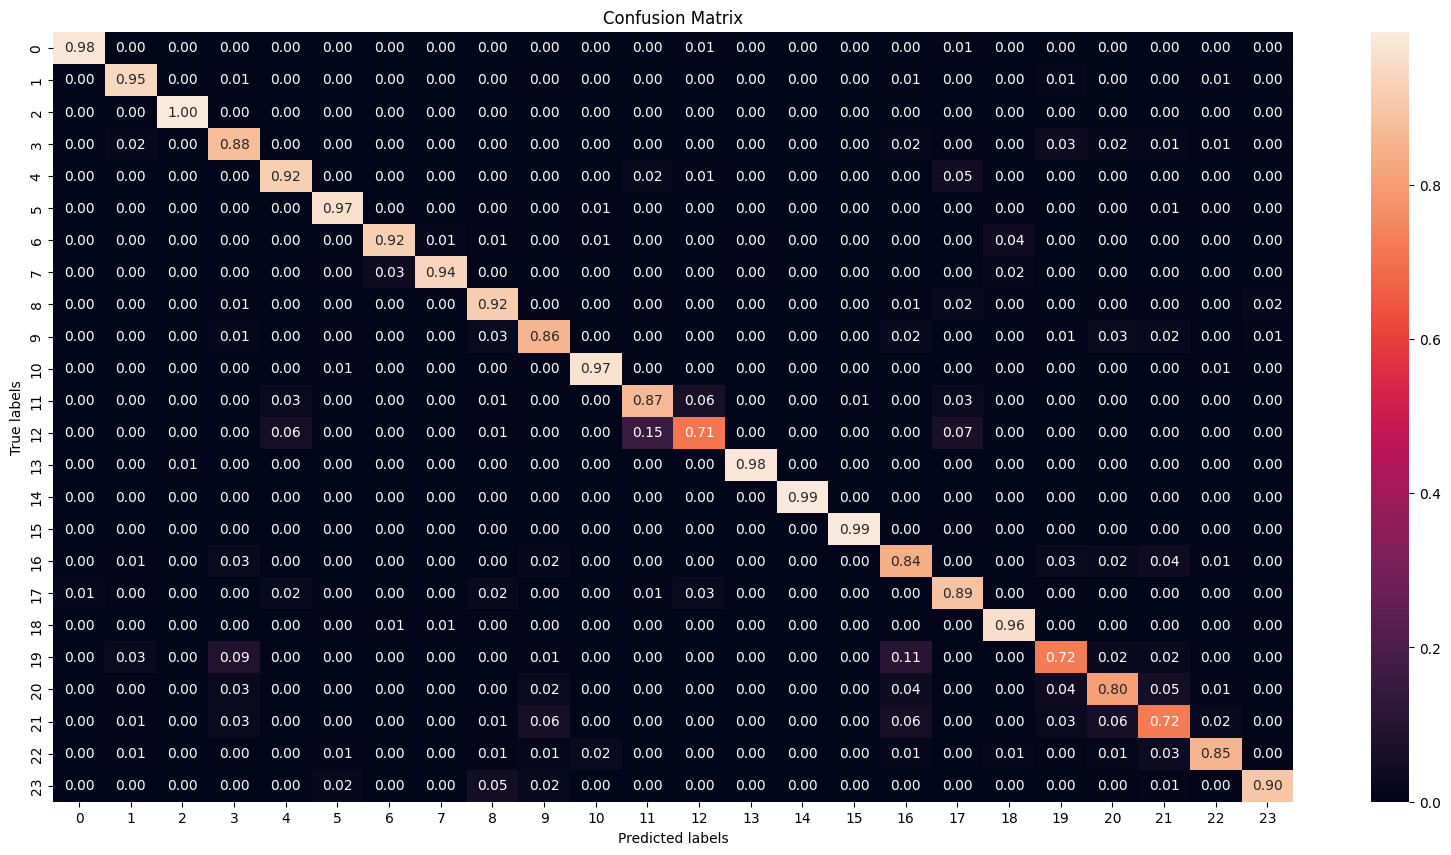

In [68]:
import matplotlib.pyplot as plt
split = 2
train_index, test_index = next(itertools.islice(kf.split(x_full), split, None))

X_train, X_test = x_full.iloc[train_index], x_full.iloc[test_index]
Y_train, Y_test = y_full[train_index], y_full[test_index]

SS_kf = StandardScaler()
X_train_SS = SS_kf.fit_transform(X_train)
X_test_SS = SS_kf.transform(X_test)
X_train_SS = pd.DataFrame(X_train_SS)
X_test_SS = pd.DataFrame(X_test_SS)
# print(X_train_SS.shape)
# 
modl = KNN(5,6)
modl.fit(X=X_train_SS, y=Y_train.ravel())

yxd = modl.predict(X_test_SS)
print("split",split,", acc_score:", accuracy_score(Y_test, yxd))


# SVM
